In [6]:
import pandas as pd
import re
import glob
import numpy as np

globbed_files = glob.glob("*.csv")

data = []
header_list = ["innovations", "repository", "user"]

for csv in globbed_files:
    frame = pd.read_csv(csv, sep=';', names=header_list)
    frame['window'] = re.findall('[0-9]+', os.path.basename(csv))[0]
    data.append(frame)

In [7]:
bigframe = pd.concat(data, ignore_index=True)
bigframe.groupby('user').sum().sort_values('innovations')

,innovations
user,
<>,1
Mr McHugh <developer@yrucalling.me>,1
Murray M. Moss <murray@mmoss.name>,1
Craig Jordan Muir <cjm@ffloat.com>,1
Myles Megyesi <mylesmegyesi@me.com>,1
Márton Salomváry <salomvary@gmail.com>,1
Nacho Coloma <icoloma@extrema-sistemas.com>,1
Cosmin L. Neagu <cosmin@dev.ro>,1
NachoSoto <ignaciosoto90@gmail.com>,1


In [5]:
bigframe.to_csv('./innovations_until_window_20.csv', index=False)

In [104]:
uniques = bigframe.groupby('user', as_index=False).agg({"repository": "nunique", "innovations": "sum", "window": "nunique"}).eval('Col4 = innovations / repository')

In [105]:
uniques

,user,repository,innovations,window,Col4
0,<>,1,1,1,1.000000
1,3rd-Eden <info@3rd-Eden.com>,3,97,2,32.333333
2,= <=>,4,39,2,9.750000
3,= <duncanwilkie@hotmail.com>,1,2,1,2.000000
4,= <jim@coursekit.com>,1,3,1,3.000000
...,...,...,...,...,...
6015,偏右 <xingmin.zhu@alipay.com>,1,1,1,1.000000
6016,宇蠢Yuest <yuestwang@gmail.com>,1,61,2,61.000000
6017,小太 <nospam.kotarou.dono@gmail.com>,1,13,1,13.000000
6018,王大力 <cookiy8511@gmail.com>,1,11,1,11.000000


In [36]:
bigframe.groupby(['user', 'window']).agg({'innovations': "sum"}).reset_index().sort_values('innovations',ascending=False)

,user,window,innovations
3723,Joshua Holbrook <josh.holbrook@gmail.com>,18,244885
7672,dragonGR <alextsanisbadlorg@gmail.com>,10,208578
2660,Govind Salavi <govindsalavi4@gmail.com>,1,148781
3725,Joshua Holbrook <josh.holbrook@gmail.com>,20,124323
7004,USER <baronelismy@gmail.com>,1,70230
1938,Developer0116 <katkova0524@gmail.com>,18,45590
3724,Joshua Holbrook <josh.holbrook@gmail.com>,19,41554
8676,zhanxiaodong <103258469@qq.com>,12,26862
2748,Hakim El Hattab <hakim.elhattab@gmail.com>,14,24998
8621,wscats <2587575267@qq.com>,8,21227


In [94]:
innovations = bigframe.groupby(['user', 'window']).agg({'innovations': "sum"}).reset_index().sort_values('innovations',ascending=False)
innovations

,user,window,innovations
3723,Joshua Holbrook <josh.holbrook@gmail.com>,18,244885
7672,dragonGR <alextsanisbadlorg@gmail.com>,10,208578
2660,Govind Salavi <govindsalavi4@gmail.com>,1,148781
3725,Joshua Holbrook <josh.holbrook@gmail.com>,20,124323
7004,USER <baronelismy@gmail.com>,1,70230
...,...,...,...
915,Blixa Morgan <blixa@projectmakeit.com>,18,1
3836,Justin Langston <jll2500@gmail.com>,16,1
2588,Geoffrey Grosenbach <boss@topfunky.com>,17,1
3842,Justin Palmer <justin@labratrevenge.com>,18,1


In [80]:
innovations.describe()

,innovations
count,8700.000000
mean,130.059885
std,4181.550593
min,1.000000
25%,2.000000
50%,5.000000
75%,12.000000
max,244885.000000


In [57]:
uniques['log_innovations'] = np.log(uniques['innovations'])


In [61]:
uniques

,user,repository,innovations,window,Col4,log_innovations
0,<>,1,1,1,1.000000,0.000000
3755,Philippe Guilbault <pguilbault@funio.com>,1,2,1,2.000000,0.693147
3753,Philipp Küng <i@philippkueng.ch>,1,7,1,7.000000,1.945910
3751,Philipp Hoenisch <philipp.hoenisch@gmail.com>,1,2,1,2.000000,0.693147
3750,Philipp Hirsch <philipp-hirsch@gmx.net>,1,5,1,5.000000,1.609438
...,...,...,...,...,...,...
5394,isaacs <i@izs.me>,15,652,9,43.466667,6.480045
2929,Marak Squires <marak.squires@gmail.com>,35,311,9,8.885714,5.739793
4579,Tim Caswell <tim@creationix.com>,14,103,9,7.357143,4.634729
3872,Reid Burke <me@reidburke.com>,4,132,9,33.000000,4.882802


In [106]:
uniques.describe()

,repository,innovations,window,Col4
count,6020.000000,6020.000000,6020.000000,6020.000000
mean,1.719934,187.960299,1.445183,109.254545
std,2.563881,6366.494887,0.965677,3521.736048
min,1.000000,1.000000,1.000000,1.000000
25%,1.000000,2.000000,1.000000,2.000000
50%,1.000000,5.000000,1.000000,4.000000
75%,2.000000,15.000000,2.000000,9.343750
max,73.000000,411163.000000,10.000000,208578.000000


In [43]:
bigframe.describe()

,innovations
count,11971.000000
mean,94.521844
std,3562.528170
min,1.000000
25%,1.000000
50%,3.000000
75%,9.000000
max,244800.000000


In [8]:
innovations_df = bigframe.groupby('window').sum().sort_values('innovations')
innovations_df.reset_index(inplace=True)
innovations_df['log_innovations'] = np.log(innovations_df['innovations'])
innovations_df

,window,innovations,log_innovations
0,9,139,4.934474
1,11,374,5.924256
2,4,5515,8.615227
3,5,10083,9.218606
4,13,11279,9.330698
5,15,12906,9.465448
6,16,16047,9.683277
7,8,21229,9.963123
8,12,27897,10.236274
9,14,31302,10.351437


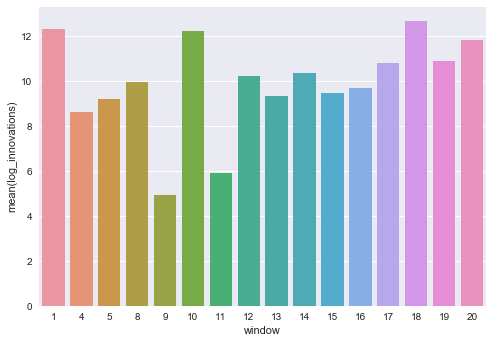

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.barplot(x="window", y="log_innovations", data=innovations_df, order=["1", "4", "5", "8", "9", "10", "11", "12", "13","14", "15", "16", "17", "18", "19", "20"])
plt.show()

In [32]:
authors_df = bigframe.groupby('window').agg({'user': "nunique"})
authors_df['log_user'] = np.log(authors_df['user'])
authors_df = authors_df.reset_index()
authors_df

,window,user,log_user
0,1,4,1.386294
1,10,12,2.484907
2,11,56,4.025352
3,12,100,4.605170
4,13,234,5.455321
5,14,554,6.317165
6,15,949,6.855409
7,16,1189,7.080868
8,17,1820,7.506592
9,18,2012,7.606885


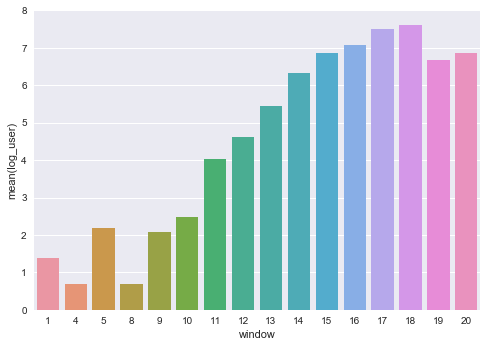

In [35]:
sns.barplot(x="window", y="log_user", data=authors_df, order=["1", "4", "5", "8", "9", "10", "11", "12", "13","14", "15", "16", "17", "18", "19", "20"])
plt.show()